In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/sp500/SP500_training.csv')

train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract Year, Month and Day
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

In [58]:
train_df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Year,Month,Day
0,DTE,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171,1970,1,2
1,KR,1970-01-02,0.878906,0.000000,128000.0,0.886719,0.882813,1970,1,2
2,GD,1970-01-02,0.703125,0.000000,232000.0,0.718750,0.718750,1970,1,2
3,JNJ,1970-01-02,1.218750,1.250000,1195200.0,1.253472,1.218750,1970,1,2
4,PG,1970-01-02,1.708984,1.710938,832000.0,1.722656,1.718750,1970,1,2


In [59]:
# Calculate the mean close price per month
monthly_mean = train_df.groupby([ 'Month'])['Close'].mean().reset_index()

# Calculate the mean close price per year
yearly_mean = train_df.groupby([ 'Year'])['Close'].mean().reset_index()

In [60]:
monthly_mean

,Month,Close
0,1,301.026157
1,2,307.499255
2,3,309.583922
3,4,311.847605
4,5,313.306519
5,6,309.030268
6,7,312.089887
7,8,314.851351
8,9,314.879600
9,10,302.681081


In [61]:
yearly_mean

,Year,Close
0,1970,5.000259
1,1971,5.704564
2,1972,5.630481
3,1973,4.949846
4,1974,3.801999
5,1975,4.070658
6,1976,4.882082
7,1977,4.860051
8,1978,4.625405
9,1979,4.614798


/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

TypeError: xticks() got multiple values for argument 'labels'

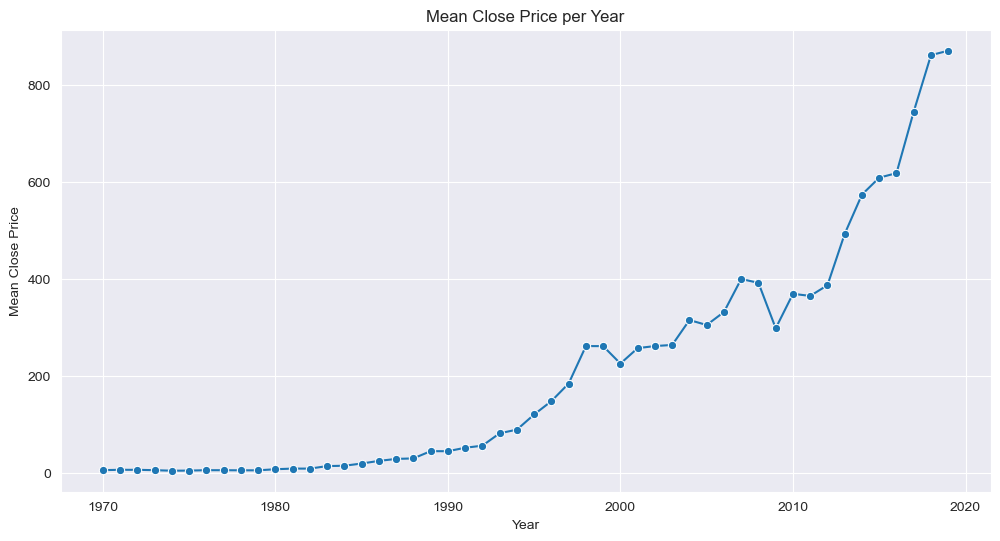

In [62]:
lst_year= yearly_mean['Year'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=yearly_mean, x='Year', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Year')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_year), labels=lst_year, rotation=45)  # Plot every nth year
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()


/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

TypeError: xticks() got multiple values for argument 'labels'

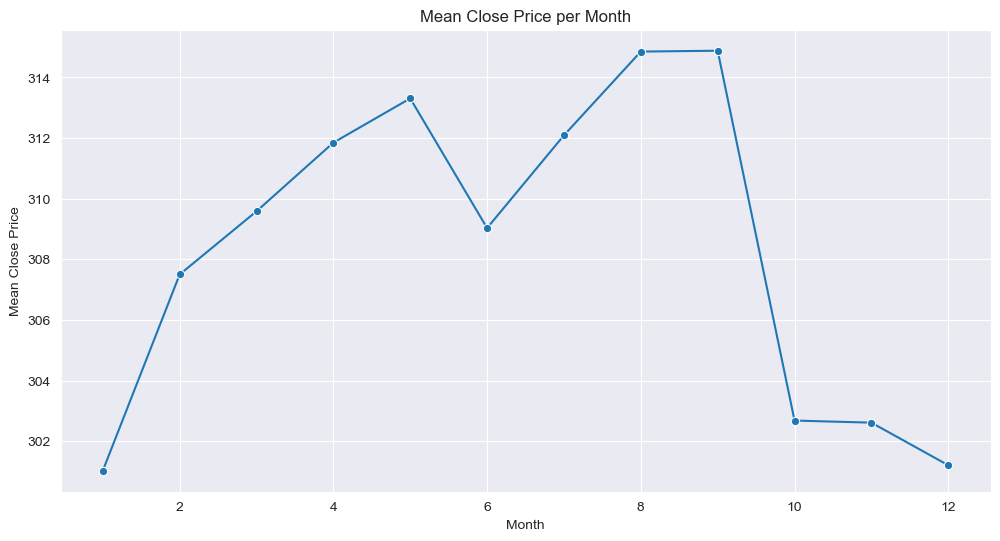

In [63]:
lst_month= monthly_mean['Month'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=monthly_mean, x='Month', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_month), labels=lst_month)  # Plot every nth month
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()

### Identifying Seasonality with Fourier Transform

In [48]:
'''# Fourier Transform
from numpy.fft import rfft
import numpy as np

# Choose a relevant column, for example, 'Close'
data = train_df['Close'].values

# Apply Fourier Transform
fourier_transform = rfft(data)

# Get frequencies
frequencies = np.fft.rfftfreq(len(data), d=1)  # d is the sample spacing
amplitudes = np.abs(fourier_transform)

In [ ]:
plt.figure(figsize=(14, 6))
plt.stem(frequencies, amplitudes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Domain')
plt.show()

In [ ]:
from scipy.signal import find_peaks

# Find Peaks in the Amplitudes to Identify Significant Frequencies
peaks, _ = find_peaks(amplitudes, height=0)  # Adjust height as needed to filter out noise

# Extract Frequencies corresponding to the Peaks
significant_freqs = frequencies[peaks]
significant_amps = amplitudes[peaks]

# Optional - Plot the Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies in the Fourier Transform')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [ ]:
# Define Frequency Range for Filtering
# Example: Keeping frequencies between 0.01 and 0.5
min_freq = 0.000001
max_freq = 0.0001

# Filter out frequencies outside this range
filtered_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))
filtered_freqs = frequencies[filtered_indices]
filtered_amps = amplitudes[filtered_indices]

# Find Peaks within the Filtered Frequencies
peaks, _ = find_peaks(filtered_amps, height=0)  # Adjust height as needed

# Extract Frequencies and Amplitudes of the Peaks
significant_freqs = filtered_freqs[peaks]
significant_amps = filtered_amps[peaks]

# Plot the Filtered Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies within Filtered Range')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [ ]:
# Convert Frequencies to Periods
significant_periods = 1 / significant_freqs

# Interpretation
for freq, period in zip(significant_freqs, significant_periods):
    # Approximate the period to the nearest integer for easier interpretation
    approx_period = round(period)

    if approx_period == 1:
        print(f"Frequency: {freq} - Pattern with period of {approx_period} days")'''

### Lag Features

In [68]:
# Create a copy of the DataFrame
lag_df = train_df.copy()

# Now proceed with sorting and creating lag features
lag_df.sort_values(by=['Ticker', 'Date'], inplace=True)

# Assuming you want to create lag features for the 'Close' price
number_of_lags = 3 

for lag in range(1, number_of_lags + 1):
    lag_df[f'lag_{lag}'] = lag_df.groupby('Ticker')['Close'].shift(lag)

In [69]:
lag_df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Year,Month,Day,lag_1,lag_2,lag_3
1148421,A,1999-11-18,28.612303,32.546494,62546380.0,35.765381,31.473534,1999,11,18,NaN,NaN,NaN
1148928,A,1999-11-19,28.478184,30.713518,15234146.0,30.758226,28.880545,1999,11,19,31.473534,NaN,NaN
1149034,A,1999-11-22,28.657009,29.551144,6577870.0,31.473534,31.473534,1999,11,22,28.880545,31.473534,NaN
1149462,A,1999-11-23,28.612303,30.400572,5975611.0,31.205294,28.612303,1999,11,23,31.473534,28.880545,31.473534
1149796,A,1999-11-24,28.612303,28.701717,4843231.0,29.998213,29.372318,1999,11,24,28.612303,31.473534,28.880545


In [70]:
def fill_with_first_close(group):
    for lag in range(1, number_of_lags + 1):
        first_valid_index = group['Close'].first_valid_index()
        first_valid_value = group.loc[first_valid_index, 'Close'] if first_valid_index is not None else 0
        group[f'lag_{lag}'] = group[f'lag_{lag}'].fillna(first_valid_value)
    return group

lag_df_updated = lag_df.groupby('Ticker').apply(fill_with_first_close)

In [77]:
lag_df_updated.head()

Ticker       Date        Low       Open      Volume       High  \
Ticker                                                                          
A      1148421      A 1999-11-18  28.612303  32.546494  62546380.0  35.765381   
       1148928      A 1999-11-19  28.478184  30.713518  15234146.0  30.758226   
       1149034      A 1999-11-22  28.657009  29.551144   6577870.0  31.473534   
       1149462      A 1999-11-23  28.612303  30.400572   5975611.0  31.205294   
       1149796      A 1999-11-24  28.612303  28.701717   4843231.0  29.998213   

                    Close  Year  Month  Day      lag_1      lag_2      lag_3  
Ticker                                                                        
A      1148421  31.473534  1999     11   18  31.473534  31.473534  31.473534  
       1148928  28.880545  1999     11   19  31.473534  31.473534  31.473534  
       1149034  31.473534  1999     11   22  28.880545  31.473534  31.473534  
       1149462  28.612303  1999     11   23  31.473534  28.880545  31.473534  
       1149796  29.372318  1999     11   24  28.612303  31.473534  28.880545

In [90]:
lag_df_encoded = lag_df_updated.copy()

from sklearn.preprocessing import LabelEncoder

# Label Encoding: risk of including sequentiality in non ordered data 
label_encoder = LabelEncoder()
lag_df_encoded['Ticker_Encoded'] = label_encoder.fit_transform(lag_df_encoded['Ticker'])

# Find the position of the original 'Ticker' column
ticker_col_index = lag_df_encoded.columns.get_loc('Ticker')

# Drop the original 'Ticker' column
lag_df_encoded.drop('Ticker', axis=1, inplace=True)

# Move 'Ticker_Encoded' to the position where 'Ticker' was
lag_df_encoded.insert(ticker_col_index, 'Ticker_Encoded', lag_df_encoded.pop('Ticker_Encoded'))
lag_df_encoded.head()

Ticker_Encoded       Date        Low       Open      Volume  \
Ticker                                                                        
A      1148421               0 1999-11-18  28.612303  32.546494  62546380.0   
       1148928               0 1999-11-19  28.478184  30.713518  15234146.0   
       1149034               0 1999-11-22  28.657009  29.551144   6577870.0   
       1149462               0 1999-11-23  28.612303  30.400572   5975611.0   
       1149796               0 1999-11-24  28.612303  28.701717   4843231.0   

                     High      Close  Year  Month  Day      lag_1      lag_2  \
Ticker                                                                         
A      1148421  35.765381  31.473534  1999     11   18  31.473534  31.473534   
       1148928  30.758226  28.880545  1999     11   19  31.473534  31.473534   
       1149034  31.473534  31.473534  1999     11   22  28.880545  31.473534   
       1149462  31.205294  28.612303  1999     11   23  31.473534  28.880545   
       1149796  29.998213  29.372318  1999     11   24  28.612303  31.473534   

                    lag_3  
Ticker                     
A      1148421  31.473534  
       1148928  31.473534  
       1149034  31.473534  
       1149462  31.473534  
       1149796  28.880545

### Window Features

In [84]:
# Window size of 20 trading days
window_size = 20

# Custom function to apply the incremental mean; important because otherwise first 19 days would have null values 
def incremental_mean(group):
    cumsum = group['Close'].cumsum()
    count = range(1, len(group) + 1)
    group['rolling_mean_monthly'] = cumsum / count
    return group

# Apply the incremental mean for the first 20 days for each ticker
lag_df_encoded = lag_df_encoded.groupby('Ticker_Encoded').apply(lambda x: incremental_mean(x.iloc[:window_size]))

lag_df_encoded.reset_index(drop=True, inplace=True)

# For the rest of the days, apply the normal rolling mean
lag_df_encoded['rolling_mean_monthly'] = lag_df_encoded.groupby('Ticker_Encoded')['Close'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

lag_df_encoded

,Ticker_Encoded,Date,Low,Open,Volume,High,Close,Year,Month,Day,lag_1,lag_2,lag_3,rolling_mean_monthly
0,0,1999-11-18,28.612303,32.546494,62546380.0,35.765381,31.473534,1999,11,18,31.473534,31.473534,31.473534,31.473534
1,0,1999-11-19,28.478184,30.713518,15234146.0,30.758226,28.880545,1999,11,19,31.473534,31.473534,31.473534,30.177039
2,0,1999-11-22,28.657009,29.551144,6577870.0,31.473534,31.473534,1999,11,22,28.880545,31.473534,31.473534,30.609204
3,0,1999-11-23,28.612303,30.400572,5975611.0,31.205294,28.612303,1999,11,23,31.473534,28.880545,31.473534,30.109979
4,0,1999-11-24,28.612303,28.701717,4843231.0,29.998213,29.372318,1999,11,24,28.612303,31.473534,28.880545,29.962447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,403,2013-02-25,32.000000,32.680000,818900.0,32.689999,32.070000,2013,2,25,32.590000,32.560001,32.720001,32.545625
8076,403,2013-02-26,31.990000,32.049999,1048700.0,32.400002,32.040001,2013,2,26,32.070000,32.590000,32.560001,32.515883
8077,403,2013-02-27,32.000000,32.000000,1343600.0,33.049999,32.320000,2013,2,27,32.040001,32.070000,32.590000,32.505000
8078,403,2013-02-28,32.560001,32.560001,2991400.0,33.549999,33.450001,2013,2,28,32.320000,32.040001,32.070000,32.554737


In [85]:
df = lag_df_encoded.copy()

df.sort_values(by="Date", inplace=True)
df.reset_index(drop=True)
df.head(100)

,Ticker_Encoded,Date,Low,Open,Volume,High,Close,Year,Month,Day,lag_1,lag_2,lag_3,rolling_mean_monthly
3800,190,1970-01-02,8.638530,8.667714,75812.0,8.959557,8.930373,1970,1,2,8.930373,8.930373,8.930373,8.930373
1300,65,1970-01-02,3.447917,3.541667,276000.0,3.541667,3.458333,1970,1,2,3.458333,3.458333,3.458333,3.458333
5100,255,1970-01-02,3.398191,0.000000,79601.0,3.423317,3.423317,1970,1,2,3.423317,3.423317,3.423317,3.423317
280,14,1970-01-02,30.125000,0.000000,10300.0,31.000000,30.625000,1970,1,2,30.625000,30.625000,30.625000,30.625000
3440,172,1970-01-02,3.912787,3.912787,56641.0,4.051820,3.992235,1970,1,2,3.992235,3.992235,3.992235,3.992235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,190,1970-01-07,8.901188,9.134662,98940.0,9.134662,8.959557,1970,1,7,9.163846,9.251399,8.930373,9.076294
3484,174,1970-01-08,0.370313,0.370757,3325901.0,0.379183,0.374305,1970,1,8,0.370757,0.369870,0.373861,0.370402
2064,103,1970-01-08,0.673081,0.673081,2316067.0,0.692348,0.683357,1970,1,8,0.666658,0.649960,0.662805,0.669227
864,43,1970-01-08,1.008230,1.032922,807975.0,1.037037,1.020576,1970,1,8,1.032922,1.028807,1.016461,1.015638


In [75]:
df.to_csv('data/sp500/SP500_training_fe.csv', index=False)